# *Docker Network*

---

## **1. 컨테이너 네트워크란?**

#### 1. 컨테이너란?

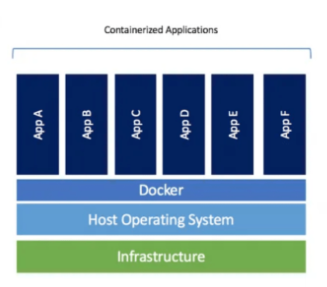

- 컨테이너는 애플리케이션과 그 실행 환경을 패키징하는 기술이다.

- 운영 체제 수준에서의 가상화로, 동일한 운영 체제 커널을 공유하지만,   
각 컨테이너는 독립된 파일 시스템, 네트워크, 프로세스 공간을 가진다.

- 이를 통해 컨테이너는 일관된 실행 환경을 보장하고, 애플리케이션을 효율적으로 배포, 실행, 관리 할 수 있게 한다.

- 주요 특징

  - 경량성 : 가상 머신보다 자원 사용이 적고, 빠르게 시작된다.

  - 이식성 : 동일한 컨테이너 이미지를 다양한 환경에서 동일하게 실행할 수 있다.

  - 격리성 : 각 컨테이너는 독립된 환경을 제공하여 애플리케이션 간의 충돌을 방지한다.

  - 확장성 : 쉽게 확장 및 축소할 수 있어 마이크로서비스 아키텍처에 적합하다.

#### 2. 컨테이너 네트워크

- 컨테이너 네트워크는 컨테이너들이 서로 통신하고 외부 네트워크와 상호작용할 수 있게 하는 기술이다.   
이를 통해 컨테이너는 필요에 따라 서로 데이터 교환을 하거나 외부 서비스와 연결될 수 있다.

- 주요 네트워크 드라이버
  - 컨테이너 네트워크에서 제공하는 네트워크 드라이버를 이해하고 적절히 선택하면 애플리케이션의 요구사항에   
  맞는 네트워크 구성을 할 수 있다.

  - 각 네트워크 드라이버는 서로 다른 기능과 특징을 가지고 있으며, 이를 이해하면 컨테이너 간의 통신, 보안, 성능 등의 측면에서 최적의 설정을 할 수 있다.

  - 네트워크 드라이버 선택 기준 : 애플리케이션의 성격, 보안 요구사항, 운영 환경, 설정 복잡성

  1. 브리지 네트워크 (Bridge Network)
    - 용도: 단일 호스트 내에서 여러 컨테이너를 서로 연결하고, 외부 네트워크와의 통신을 설정할 때 사용.
    - 장점: 간단하게 설정 가능, 기본 네트워크로 사용되기 적합.
    - 사용 예시: 개발 환경에서 여러 서비스 컨테이너를 실행하여 테스트할 때.
    
  2. 호스트 네트워크 (Host Network)
    - 용도: 네트워크 성능이 중요한 애플리케이션에 사용.
    - 장점: 컨테이너가 호스트의 네트워크 인터페이스를 직접 사용하여 오버헤드가 적음.
    - 단점: 네트워크 격리가 없으므로 보안에 주의가 필요.
    - 사용 예시: 높은 네트워크 성능이 요구되는 데이터베이스 서버.
    
  3. 오버레이 네트워크 (Overlay Network)
    - 용도: 다중 호스트 환경에서 네트워크를 설정할 때 사용.
    - 장점: 클러스터 내의 컨테이너 간 통신을 지원, Docker Swarm이나 Kubernetes와 같은 오케스트레이션 툴과 함께 사용.
    - 사용 예시: 분산 시스템 환경에서 여러 호스트에 걸쳐 있는 마이크로서비스 아키텍처.
  
  4. 맥브릿지 네트워크 (Macvlan Network):
    - 용도: 컨테이너가 물리적 네트워크 인터페이스와 직접 연결되어야 할 때 사용.
    - 장점: 각 컨테이너가 고유한 MAC 주소를 가져 네트워크 장비와 직접 통신 가능.
    - 사용 예시: 기존 네트워크 인프라와 통합되어야 하는 환경.
  
  5. 넌 네트워크 (None Network):
    - 용도: 네트워크 연결이 필요 없는 독립적인 작업을 수행할 때 사용.
    - 장점: 네트워크 오버헤드가 없고, 완전한 네트워크 격리 제공.
    - 사용 예시: 데이터 처리 작업, 보안이 중요한 독립적인 애플리케이션 실행.

---

## **2. Docker Network**

- Docker는 컨테이너 기반의 오픈소스 가상화 플랫폼으로, 애플리케이션의 개발, 배포, 실행을 자동화 한다.

- Docker를 사용하면 컨테이너를 쉽게 생성, 배포, 관리할 수 있다.
    
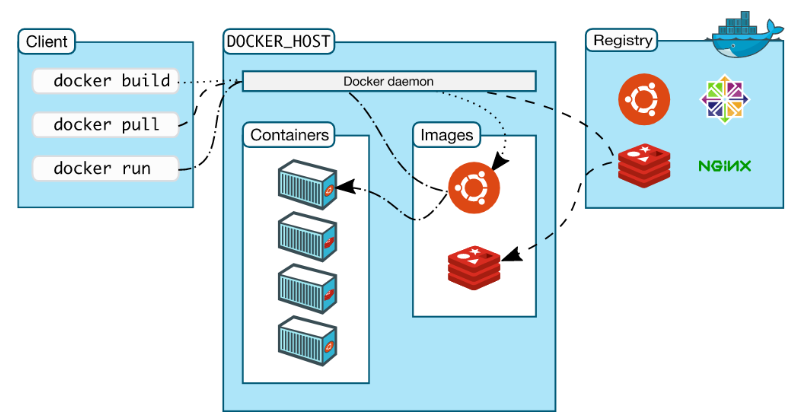


#### 1. Docker의 주요 기능

  - 이미지 관리 : 컨테이너 이미지를 빌드하고 배포하며, Docker Hub와 같은 저장소를 통해 공유할 수 있다.

  - 컨테이너 관리 : 컨테이너의 생명주기를 관리하며, 여러 컨테이너를 효율적으로 배포, 확장할 수 있다.

  - 네트워킹 : 다양한 네트워크 드라이버를 통해 컨테이너 간의 통신을 지원한다.

  - 스토리지 관리 : 데이터 볼륨을 사용하여 컨테이너 간 데이터를 공유하고, 데이터를 영구적으로 저장할 수 있다.


#### 2. Docker Layer

- ubuntu의 이미지는 A+B+C이다. nginx의 경우 A+B+C+Nginx를 하고 싶다. 이때 Layer 기능을 이용하여 ubuntu에 nginx만 쌓으면 된다.   

  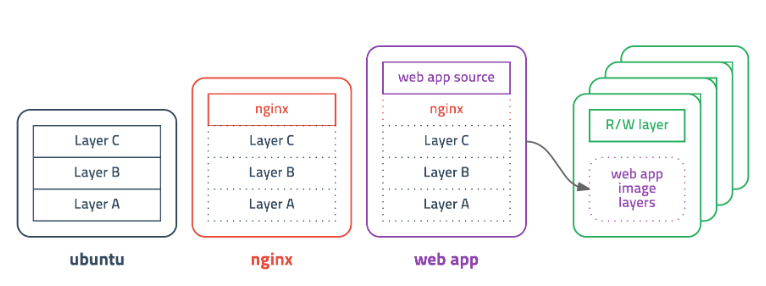


- 이미지 경로   

  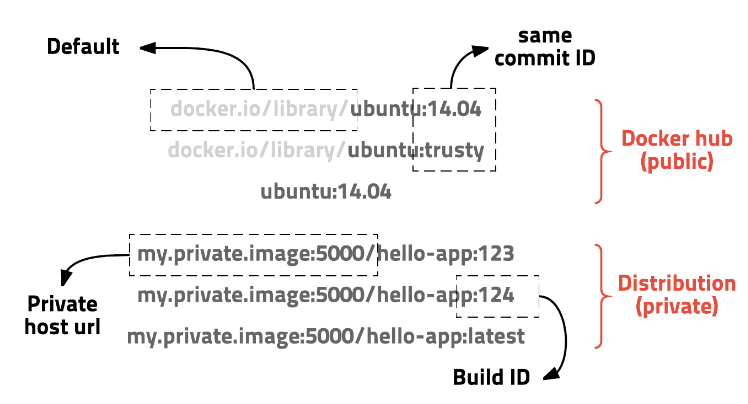


  1. Dockerfile Script
    - Docker 컨테이너로 패키징하는 과정

      ```dockerfile
      # 베이스 이미지로 Python 3.8을 사용
      FROM python:3.8-slim

      # 애플리케이션 디렉터리를 생성
      WORKDIR /app

      # 현재 디렉터리의 모든 파일을 컨테이너의 /app 디렉터리에 복사
      COPY . /app

      # 필요한 패키지를 설치
      RUN pip install --no-cache-dir -r requirements.txt

      # 컨테이너가 실행될 때 실행할 명령을 정의
      CMD ["python", "app.py"]
      ```
  
  2. Image Build
    - 'docker build' : DOcker 이미지를 빌드하는 명령어
    - '-t my-python-app' : 빌드한 이미지에 'my-python-app'이라는 태그를 붙임
    - '.' : 현재 디렉터리를 빌드 컨텍스트로 사용

      ```bash
      docker build -t my-python-app .
      ```
  
  3. Container Run
    - 'docker run' : Docker 컨테이너를 실행하는 명령어
    - '-d' : 컨테이너를 백그라운드에서 실행
    - '-p 5000:5000' : 호스트의 포트 5000을 컨테이너의 포트 5000에 바인딩
    - '--name my-running-app' : 컨테이너에 my-running-app이라는 이름을 부여
    - 'my-python-app' : 실행할 이미지 이름

      ```bash
      docker run -d -p 5000:5000 my-python-app
      ```


